In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [4]:
df = pd.read_csv("mabel.txt",header=None,on_bad_lines="skip",encoding='utf8')


In [5]:
df=df.drop(0)# drop first column
df.columns=['Date','Chat']# name the column
Message=df["Chat"].str.split("-",n=1,expand=True)#split time
df["Time"]=Message[0]
Message1=Message[1].str.split(":",n=1,expand=True)# split chat
df["Name"]=Message1[0]
df["Chat"]=Message1[1]
df=df[["Date","Time","Name","Chat"]]# rename in order
df

,Date,Time,Name,Chat
1,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke
2,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name
3,05/12/19,1:42 pm,AR❤,Ramisha Rani K
4,05/12/19,1:42 pm,Mabel Infoziant,Ok
5,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com
6,05/12/19,1:43 pm,Mabel Infoziant,Your email Id?
7,05/12/19,1:43 pm,AR❤,Yes Mam
8,05/12/19,1:43 pm,Mabel Infoziant,I will send 2 abstracts for u to start working
9,05/12/19,1:43 pm,AR❤,Yeah mam
10,05/12/19,1:43 pm,Mabel Infoziant,Give me the list that u have too


# SENTIMENT ANALYSIS

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Date    0
Time    0
Name    0
Chat    0
dtype: int64

In [25]:
 sid = SentimentIntensityAnalyzer()

In [26]:
 def sentimentalAnalysis(df,columnname):
        df['scores'] = df[columnname].apply(lambda commentText: sid.polarity_scores(commentText))
        df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
        df['Negtive']  = df['scores'].apply(lambda score_dict: score_dict['neg'])
        df['Postive']  = df['scores'].apply(lambda score_dict: score_dict['pos'])
        df['Neutral']  = df['scores'].apply(lambda score_dict: score_dict['neu'])
        
        "Creating final pos or neg using compound score"
        df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
        plt.clf()
        "Checking how many pos and neg"
        posneg=pd.DataFrame(df['comp_score'].value_counts())
        return posneg,df

In [27]:
pos,df_senti= sentimentalAnalysis(df,columnname='Chat')

<Figure size 640x480 with 0 Axes>

In [28]:
df_senti

,Date,Time,Name,Chat,scores,compound,Negtive,Postive,Neutral,comp_score
1,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
2,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
3,05/12/19,1:42 pm,AR❤,Ramisha Rani K,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
4,05/12/19,1:42 pm,Mabel Infoziant,Ok,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.2960,0.000,1.000,0.000,pos
5,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
6,05/12/19,1:43 pm,Mabel Infoziant,Your email Id?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
7,05/12/19,1:43 pm,AR❤,Yes Mam,"{'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compou...",0.4019,0.000,0.730,0.270,pos
8,05/12/19,1:43 pm,Mabel Infoziant,I will send 2 abstracts for u to start working,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
9,05/12/19,1:43 pm,AR❤,Yeah mam,"{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'comp...",0.2960,0.000,0.688,0.312,pos
10,05/12/19,1:43 pm,Mabel Infoziant,Give me the list that u have too,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos


In [29]:
pos

,comp_score
pos,48
neg,2


# TOPIC MODELLING

# count vectorizer with NMF

In [31]:
cv = CountVectorizer(max_df=0.95,min_df=2,stop_words='english')
CV= cv.fit_transform(df["Chat"])

In [32]:
nmf_model = NMF(n_components=3,random_state=42)
nmf_model.fit(CV)

C:\Anaconda\envs\aiml\lib\site-packages\sklearn\decomposition\_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


NMF(n_components=3, random_state=42)

In [38]:
for index,topic in enumerate(nmf_model.components_):
    results=([cv.get_feature_names()[i]for i in topic.argsort()[-10:]])
    print(results)


['share', 'soon', 'ok', 'ask', 'yeah', 'sure', 'kk', 'read', 'abstract', 'mam']
['know', 'share', 'ask', 'need', 'students', 'phone', 'details', 'office', 'number', 'send']
['ask', 'abstracts', 'number', 'mam', 'hi', 'church', 'know', 'office', 'just', 'tomorrow']


In [40]:
topic=nmf_model.transform(CV)
df["Topic"]= topic.argmax(axis=1)
df

,Date,Time,Name,Chat,scores,compound,Negtive,Postive,Neutral,comp_score,Topic
1,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,2
2,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,0
3,05/12/19,1:42 pm,AR❤,Ramisha Rani K,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,1
4,05/12/19,1:42 pm,Mabel Infoziant,Ok,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.2960,0.000,1.000,0.000,pos,0
5,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,0
6,05/12/19,1:43 pm,Mabel Infoziant,Your email Id?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,0
7,05/12/19,1:43 pm,AR❤,Yes Mam,"{'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compou...",0.4019,0.000,0.730,0.270,pos,0
8,05/12/19,1:43 pm,Mabel Infoziant,I will send 2 abstracts for u to start working,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,1
9,05/12/19,1:43 pm,AR❤,Yeah mam,"{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'comp...",0.2960,0.000,0.688,0.312,pos,0
10,05/12/19,1:43 pm,Mabel Infoziant,Give me the list that u have too,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos,0


In [41]:
df["Topic"].value_counts()

0    32
1    13
2     5
Name: Topic, dtype: int64

# WORD CLOUD

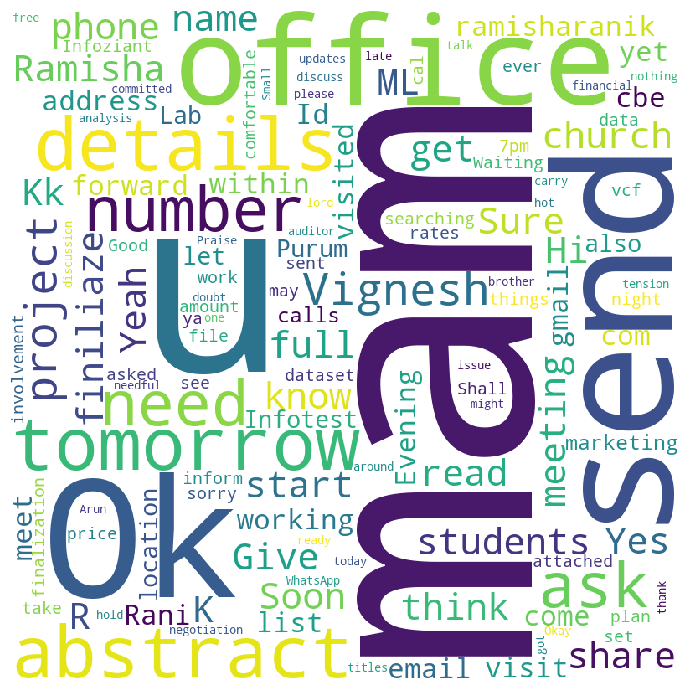

Successfully created


In [44]:
# Prepare stopwords
stoplist = set(stopwords.words('english') + ['omitted', 'voice', 'missed', 'call', 'video', 'deleted', 'media', 'message'])

# Combine all chat text (skipping first if needed)
text = " ".join(df['Chat'].iloc[1:].astype(str))

# Generate and display word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stoplist, min_font_size=10).generate(text)

plt.figure(figsize=(9, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.savefig('wordcloud.PNG')
plt.show()

print("Successfully created")